<a href="https://colab.research.google.com/github/billybuonocore/Finance/blob/main/Final_lab_William%20Buonocore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
%%capture
!pip install wandb #start of code
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [53]:
def GPU(data):  #data to start and to make easier
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray') #code 
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [1]:
url = "https://docs.google.com/presentation/d/1UZvcd3KS3tdcQmb6QXS1GIFy-zaxpCQOOD1k9LAU1xY/edit#slide=id.p"

In [2]:
url = "https://docs.google.com/presentation/d/1UZvcd3KS3tdcQmb6QXS1GIFy-zaxpCQOOD1k9LAU1xY/edit#slide=id.p"

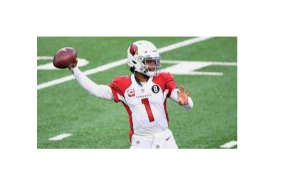

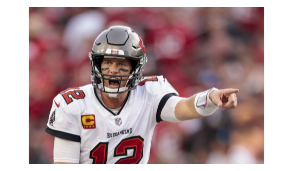

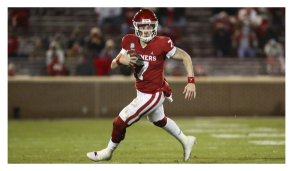

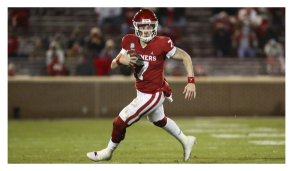

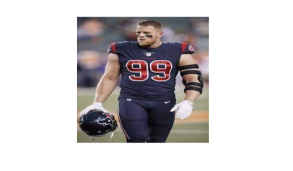

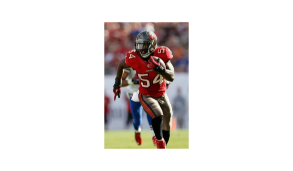

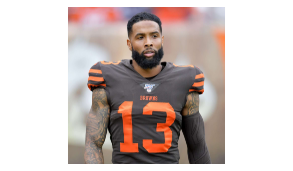

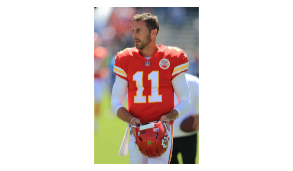

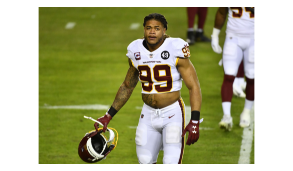

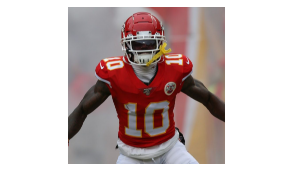

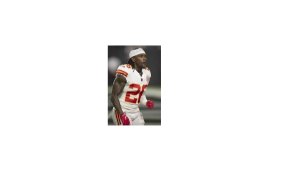

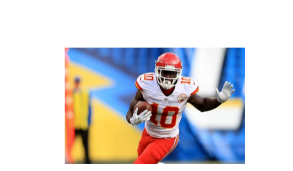

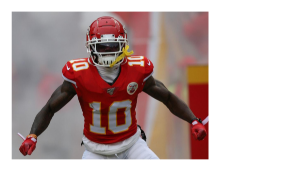

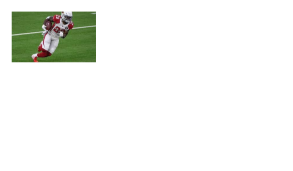

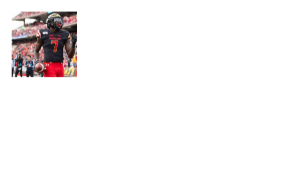

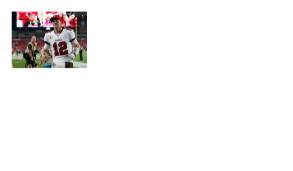

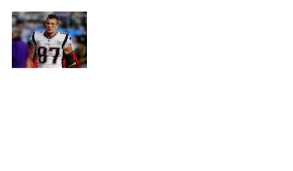

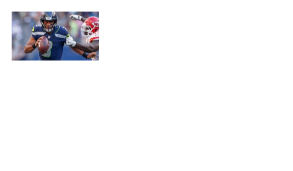

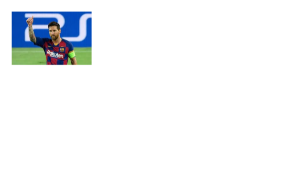

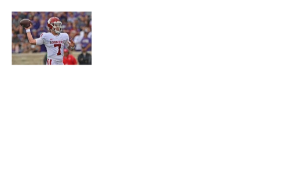

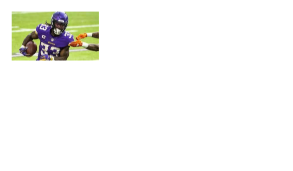

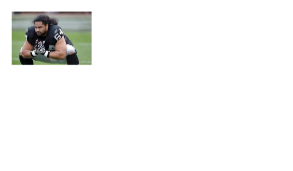

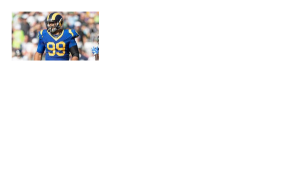

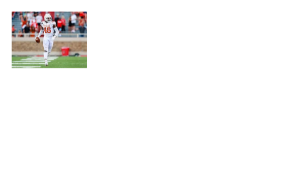

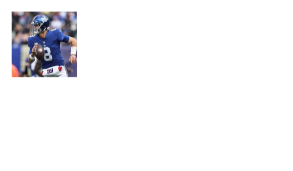

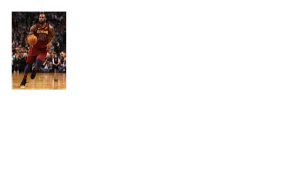

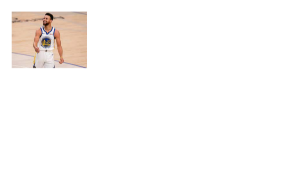

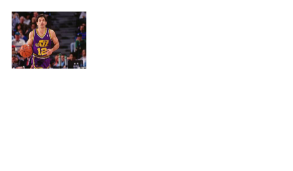

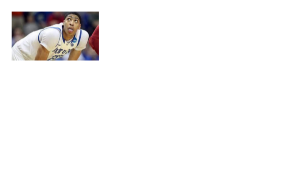

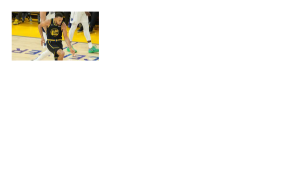

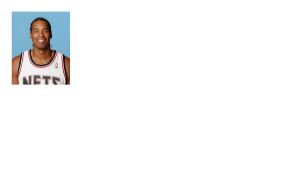

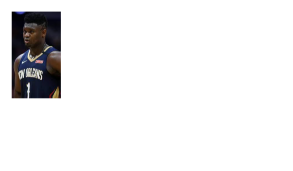

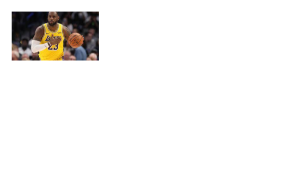

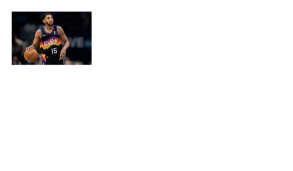

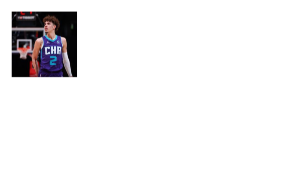

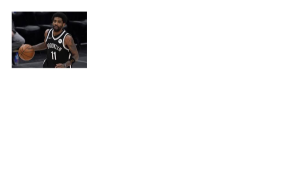

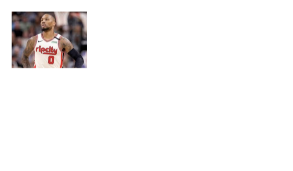

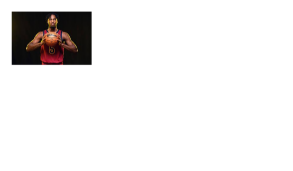

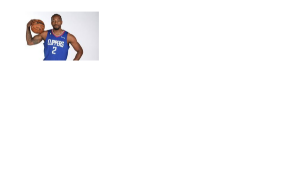

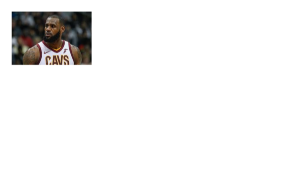

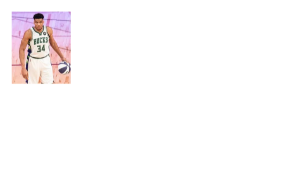

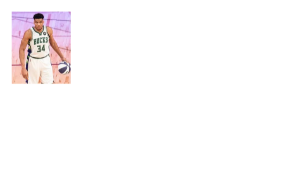

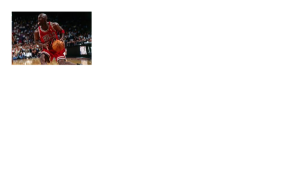

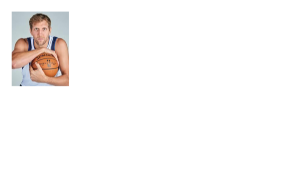

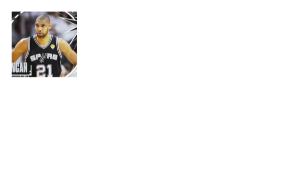

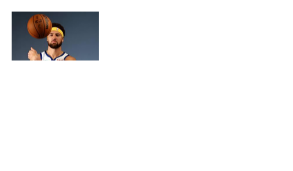

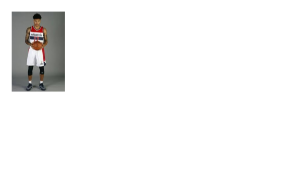

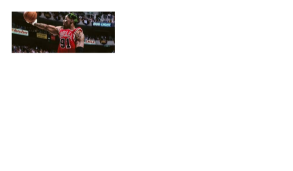

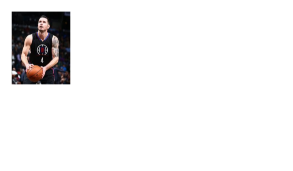

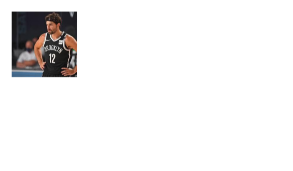

In [12]:
images = [] #animals for slideshow

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [13]:
images.shape

torch.Size([50, 3, 224, 224])

In [14]:
model(images)

tensor([[-0.1694,  2.2716, -3.8215,  ..., -3.6154,  1.2302,  3.6795],
        [-1.8528, -4.1950, -1.2429,  ..., -3.7757,  0.5073,  4.2655],
        [-6.3731, -6.1468, -0.9587,  ..., -6.0615,  1.8604,  1.4541],
        ...,
        [-0.6541, -1.0573, -2.9736,  ..., -3.9500, -0.7467,  1.7067],
        [-0.1624, -0.7408, -1.8411,  ..., -2.8072, -1.0193,  0.8879],
        [-1.5052, -0.7289, -2.7289,  ..., -2.7646, -1.2075,  0.5047]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [15]:
y = model(images)

In [16]:
y.shape

torch.Size([50, 1000])

In [17]:
guesses = torch.argmax(y, 1).cpu().numpy() #random image that appears

In [50]:
for i in list(guesses): #random generator of all names of pics
    print(labels[i])

ballplayer, baseball player
football helmet
football helmet
football helmet
baseball
ski
bulletproof vest
horizontal bar, high bar
soccer ball
football helmet
iPod
football helmet
football helmet
web site, website, internet site, site
panpipe, pandean pipe, syrinx
panpipe, pandean pipe, syrinx
lighter, light, igniter, ignitor
parachute, chute
web site, website, internet site, site
panpipe, pandean pipe, syrinx
envelope
power drill
hair slide
lighter, light, igniter, ignitor
panpipe, pandean pipe, syrinx
letter opener, paper knife, paperknife
envelope
panpipe, pandean pipe, syrinx
punching bag, punch bag, punching ball, punchball
power drill
panpipe, pandean pipe, syrinx
letter opener, paper knife, paperknife
abaya
cleaver, meat cleaver, chopper
nail
assault rifle, assault gun
assault rifle, assault gun
abaya
syringe
panpipe, pandean pipe, syrinx
syringe
syringe
assault rifle, assault gun
letter opener, paper knife, paperknife
kite
envelope
letter opener, paper knife, paperknife
scale, 

In [19]:
Y = np.zeros(50,)
Y[25:] = 1

In [20]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
X = y.detach().cpu().numpy() 

In [23]:
X.shape

(50, 1000)

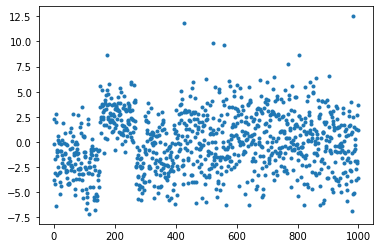

In [24]:
plt.plot(X[0],'.')

In [25]:
X[0]

array([-1.69388413e-01,  2.27155995e+00, -3.82153153e+00, -4.14116526e+00,
       -1.67864060e+00, -3.08908534e+00, -6.33396339e+00,  2.00288582e+00,
        2.81486797e+00, -3.31082153e+00, -9.87167001e-01, -1.38626289e+00,
       -8.16331387e-01, -2.44056511e+00,  6.11141860e-01,  2.22876996e-01,
        1.13497674e-02, -7.45867193e-02, -3.07298136e+00, -2.99119091e+00,
       -4.01136589e+00, -9.02639270e-01, -5.12999630e+00, -8.82588983e-01,
       -2.43644416e-01, -4.34418249e+00, -1.28756547e+00,  1.91868246e-01,
       -2.11649704e+00, -2.52422023e+00, -1.68398249e+00,  1.86606646e+00,
       -6.01955354e-02, -2.38820887e+00, -2.38233232e+00, -2.51011753e+00,
        9.32485640e-01, -1.22917998e+00, -1.07749546e+00, -2.94877458e+00,
       -2.80431795e+00, -2.06047535e-01, -2.83193207e+00, -3.58874559e+00,
       -2.87403584e-01, -4.20554924e+00, -2.12198424e+00, -2.09876347e+00,
       -4.12290907e+00, -4.10017872e+00, -4.15343285e+00, -1.58218312e+00,
        1.03647995e+00, -

In [26]:
np.argmax(X[0])

981

In [27]:
labels[948]

'Granny Smith'

In [28]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [29]:
for i in top_ten:
    print(labels[i])

ballplayer, baseball player
baseball
croquet ball
football helmet
soccer ball
Saluki, gazelle hound
rugby ball
whistle
pinwheel
torch


In [47]:
labels  #labels from pictures

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

TypeError: ignored

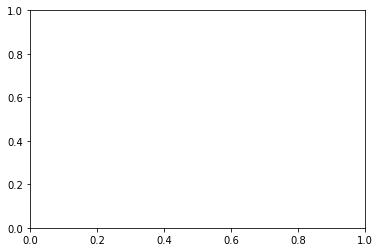

In [49]:
plt.hist(X[0])         #plot from my new pictures

In [34]:
X = GPU_data(X)
Y = GPU_data(Y)

In [35]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None]) #dataset
    s = s1 / s1.sum(1)[:,None]
    return s

In [36]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [37]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [38]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [39]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [41]:
X.shape

torch.Size([50, 1000])

In [40]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [43]:
def model(x,w):

    return x@w[0]

In [42]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [44]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-8-5269f554e9ae>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

In [45]:
best loss = 97          #best,worst,average of 3 runs of my new images

average loss = 84

worst loss = 81

SyntaxError: ignored